<img src="../../../images/banners/pandas-cropped.jpeg" width="600"/>

<a class="anchor" id="intro_to_data_structures"></a>
# <img src="../../../images/logos/pandas.png" width="23"/> DataFrame

## <img src="../../../images/logos/toc.png" width="20"/> Table of Contents
* [Create a Dataframe](#)
    * [From dict of Series or dicts](#from_dict_of_series_or_dicts)
    * [From dict of ndarrays / lists](#from_dict_of_ndarrays_/_lists)
    * [From structured or record array](#from_structured_or_record_array)
    * [From a list of dicts](#from_a_list_of_dicts)
    * [From a dict of tuples](#from_a_dict_of_tuples)
    * [From a Series](#from_a_series)
    * [From a list of namedtuples](#from_a_list_of_namedtuples)
    * [From a list of dataclasses](#from_a_list_of_dataclasses)
    * [Alternate constructors](#alternate_constructors)
* [Column selection, addition, deletion](#column_selection,_addition,_deletion)
* [Assigning new columns in method chains](#assigning_new_columns_in_method_chains)
* [Indexing / selection](#indexing_/_selection)
* [Data alignment and arithmetic](#data_alignment_and_arithmetic)
* [Transposing](#transposing)
* [DataFrame interoperability with NumPy functions](#dataframe_interoperability_with_numpy_functions)
* [Console display](#console_display)
* [DataFrame column attribute access and IPython completion](#dataframe_column_attribute_access_and_ipython_completion)

---

In [2]:
import pandas as pd
import numpy as np

**DataFrame** is a 2-dimensional labeled data structure with columns of
potentially different types. You can think of it like a spreadsheet or SQL
table, or a dict of Series objects. It is generally the most commonly used
pandas object.

## Create a DataFrame

Like Series, DataFrame accepts many different kinds of input:
- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A `Series`
- Another `DataFrame`

Along with the data, you can optionally pass **index** (row labels) and
**columns** (column labels) arguments. If you pass an index and / or columns,
you are guaranteeing the index and / or columns of the resulting
DataFrame. Thus, a dict of Series plus a specific index will discard all data
not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data
based on common sense rules.

> **Note:**
> When the data is a dict, and `columns` is not specified, the `DataFrame`
columns will be ordered by the dict’s insertion order, if you are using
Python version >= 3.6 and pandas >= 0.23.
> 
> If you are using Python < 3.6 or pandas < 0.23, and `columns` is not
specified, the `DataFrame` columns will be the lexically ordered list of dict
keys.

<a class="anchor" id="from_dict_of_series_or_dicts"></a>
### From dict of Series or dicts

The resulting **index** will be the **union** of the indexes of the various
Series. If there are any nested dicts, these will first be converted to
Series. If no columns are passed, the columns will be the ordered list of dict
keys.

In [3]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [4]:
df = pd.DataFrame(d)

In [5]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [6]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [7]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


The row and column labels can be accessed respectively by accessing the
**index** and **columns** attributes:

> **Note:**
> When a particular set of columns is passed along with a dict of data, the
passed columns override the keys in the dict.

In [8]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [9]:
df.columns

Index(['one', 'two'], dtype='object')

<a class="anchor" id="from_dict_of_ndarrays_/_lists"></a>
### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must
clearly also be the same length as the arrays. If no index is passed, the
result will be `range(n)`, where `n` is the array length.

In [10]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

In [11]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [12]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


<a class="anchor" id="from_structured_or_record_array"></a>
### From structured or record array

This case is handled identically to a dict of arrays.

In [13]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])

In [14]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

In [15]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [16]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [17]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


> **Note:**
> DataFrame is not intended to work exactly like a 2-dimensional NumPy
ndarray.

<a class="anchor" id="from_a_list_of_dicts"></a>
### From a list of dicts

In [18]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]

In [19]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [20]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [21]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


<a class="anchor" id="from_a_dict_of_tuples"></a>
### From a dict of tuples

You can automatically create a MultiIndexed frame by passing a tuples
dictionary.

In [22]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)


a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

<a class="anchor" id="from_a_series"></a>
### From a Series

The result will be a DataFrame with the same index as the input Series, and
with one column whose name is the original name of the Series (only if no other
column name provided).

<a class="anchor" id="from_a_list_of_namedtuples"></a>
### From a list of namedtuples

The field names of the first `namedtuple` in the list determine the columns
of the `DataFrame`. The remaining namedtuples (or tuples) are simply unpacked
and their values are fed into the rows of the `DataFrame`. If any of those
tuples is shorter than the first `namedtuple` then the later columns in the
corresponding row are marked as missing values. If any are longer than the
first `namedtuple`, a `ValueError` is raised.

In [23]:
from collections import namedtuple

In [24]:
Point = namedtuple("Point", "x y")

In [25]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [26]:
Point3D = namedtuple("Point3D", "x y z")

In [27]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


<a class="anchor" id="from_a_list_of_dataclasses"></a>
### From a list of dataclasses

New in version 1.1.0.

Data Classes as introduced in [PEP557](https://www.python.org/dev/peps/pep-0557),
can be passed into the DataFrame constructor.
Passing a list of dataclasses is equivalent to passing a list of dictionaries.

Please be aware, that all values in the list should be dataclasses, mixing
types in the list would result in a TypeError.

In [28]:
from dataclasses import make_dataclass
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


<a class="anchor" id="alternate_constructors"></a>
### Alternate constructors

**DataFrame.from_dict**

`DataFrame.from_dict` takes a dict of dicts or a dict of array-like sequences
and returns a DataFrame. It operates like the `DataFrame` constructor except
for the `orient` parameter which is `'columns'` by default, but which can be
set to `'index'` in order to use the dict keys as row labels.

In [29]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


If you pass `orient='index'`, the keys will be the row labels. In this
case, you can also pass the desired column names:

In [30]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)


,one,two,three
A,1,2,3
B,4,5,6


**DataFrame.from_records**

`DataFrame.from_records` takes a list of tuples or an ndarray with structured
dtype. It works analogously to the normal `DataFrame` constructor, except that
the resulting DataFrame index may be a specific field of the structured
dtype. For example:

In [31]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [32]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


<a class="anchor" id="column_selection,_addition,_deletion"></a>
## Column selection, addition, deletion

You can treat a DataFrame semantically like a dict of like-indexed Series
objects. Getting, setting, and deleting columns works with the same syntax as
the analogous dict operations:

In [33]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [34]:
df["three"] = df["one"] * df["two"]

In [35]:
df["flag"] = df["one"] > 2

In [36]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted or popped like with a dict:

In [37]:
del df["two"]

In [38]:
three = df.pop("three")

In [39]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


When inserting a scalar value, it will naturally be propagated to fill the
column:

In [40]:
df["foo"] = "bar"

In [41]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a Series that does not have the same index as the DataFrame, it
will be conformed to the DataFrame’s index:

In [42]:
df["one_trunc"] = df["one"][:2]

In [43]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the
DataFrame’s index.

By default, columns get inserted at the end. The `insert` function is
available to insert at a particular location in the columns:

In [44]:
df.insert(1, "bar", df["one"])

In [45]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


<a class="anchor" id="assigning_new_columns_in_method_chains"></a>
## Assigning new columns in method chains

Inspired by [dplyr’s](https://dplyr.tidyverse.org/reference/mutate.html)
`mutate` verb, DataFrame has an [`assign()`](../reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign "pandas.DataFrame.assign")
method that allows you to easily create new columns that are potentially
derived from existing columns.

In [46]:
iris = pd.read_csv("../../data/iris.data")

In [47]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In the example above, we inserted a precomputed value. We can also pass in
a function of one argument to be evaluated on the DataFrame being assigned to.

In [49]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


`assign` **always** returns a copy of the data, leaving the original
DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is
useful when you don’t have a reference to the DataFrame at hand. This is
common when using `assign` in a chain of operations. For example,
we can limit the DataFrame to just those observations with a Sepal Length
greater than 5, calculate the ratio, and plot:

<AxesSubplot:xlabel='SepalRatio', ylabel='PetalRatio'>

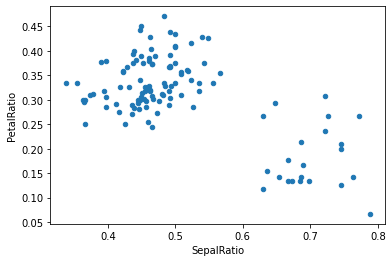

In [50]:
%matplotlib inline
(
    iris.query("SepalLength > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

<a class="anchor" id="indexing_/_selection"></a>
## Indexing / selection

The basics of indexing are as follows:


|Operation|Syntax|Result|
|:--|:--|:--|
|Select column|`df[col]`|Series|
|Select row by label|`df.loc[label]`|Series|
|Select row by integer location|`df.iloc[loc]`|Series|
|Slice rows|`df[5:10]`|DataFrame|
|Select rows by boolean vector|`df[bool_vec]`|DataFrame|

Row selection, for example, returns a Series whose index is the columns of the
DataFrame:

In [51]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [52]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

> A more exhaustive treatment of sophisticated label-based indexing and
slicing, will be covered later. We will address the
fundamentals of reindexing / conforming to new sets of labels.

<a class="anchor" id="data_alignment_and_arithmetic"></a>
## Data alignment and arithmetic

Data alignment between DataFrame objects automatically align on **both the
columns and the index (row labels)**. Again, the resulting object will have the
union of the column and row labels.

In [53]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])

In [54]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [55]:
df + df2

,A,B,C,D
0,-0.801713,-1.004270,-1.399830,NaN
1,-0.675490,1.391420,1.511100,NaN
2,2.044998,-1.376368,-1.778327,NaN
3,2.209413,-0.517473,-1.519804,NaN
4,0.692652,1.428191,-0.002440,NaN
5,-0.932095,1.305450,-0.316591,NaN
6,-0.995912,0.502952,-0.008971,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between DataFrame and Series, the default behavior is
to align the Series **index** on the DataFrame **columns**, thus [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)
row-wise. For example:

In [56]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-1.764312,-0.059506,2.481340,-1.602537
2,-0.241024,-2.397195,0.357747,-2.522988
3,0.631792,0.305899,0.502190,0.093457
4,0.730656,0.175708,0.367927,-0.866917
5,-1.177103,0.928325,2.315187,-1.279728
6,-1.661171,0.153009,2.211896,0.033099
7,-1.946002,-0.615090,1.723518,-1.232338
8,0.216157,-0.152853,3.696943,-1.668246
9,-0.520928,0.644696,1.512962,-0.359320


Operations with scalars are just as you would expect:

In [57]:
df * 5 + 2

,A,B,C,D
0,3.196248,3.630071,-4.827519,5.194073
1,-5.625314,3.332540,7.579182,-2.818613
2,1.991128,-8.355903,-3.038783,-7.420866
3,6.355209,5.159564,-2.316569,5.661360
4,6.849529,4.508610,-2.987883,0.859490
5,-2.689266,8.271698,6.748418,-1.204565
6,-5.109605,4.395117,6.231963,5.359569
7,-6.533759,0.554619,3.790073,-0.967615
8,4.277033,2.865804,13.657193,-3.147157
9,0.591610,6.853552,2.737289,3.397474


In [58]:
1 / df

,A,B,C,D
0,4.179734,3.067351,-0.732330,1.565399
1,-0.655711,3.752231,0.896189,-1.037643
2,-563.542597,-0.482816,-0.992303,-0.530737
3,1.148051,1.582497,-1.158327,1.365613
4,1.031028,1.993135,-1.002429,-4.384002
5,-1.066265,0.797232,1.052982,-1.560274
6,-0.703274,2.087581,1.181485,1.488286
7,-0.585908,-3.459296,2.793182,-1.684854
8,2.195840,5.774977,0.428920,-0.971410
9,-3.550153,1.030173,6.781605,3.577884


In [59]:
df ** 4

,A,B,C,D
0,3.276465e-03,0.011297,3.476736,0.166533
1,5.409422e+00,0.005045,1.550251,0.862598
2,9.915007e-12,18.402291,1.031389,12.603269
3,5.756465e-01,0.159451,0.555488,0.287534
4,8.849486e-01,0.063365,0.990341,0.002707
5,7.736408e-01,2.475487,0.813422,0.168732
6,4.087915e+00,0.052653,0.513201,0.203823
7,8.485579e+00,0.006983,0.016429,0.124094
8,4.301277e-02,0.000899,29.545816,1.123025
9,6.295230e-03,0.887889,0.000473,0.006102


Boolean operators work as well:

In [60]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

In [61]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [62]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [63]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [64]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


<a class="anchor" id="transposing"></a>
### Transposing

To transpose, access the `T` attribute (also the `transpose` function),
similar to an ndarray:

In [65]:
df[:5].T

,0,1,2,3,4
A,0.239250,-1.525063,-0.001774,0.871042,0.969906
B,0.326014,0.266508,-2.071181,0.631913,0.501722
C,-1.365504,1.115836,-1.007757,-0.863314,-0.997577
D,0.638815,-0.963723,-1.884173,0.732272,-0.228102


<a class="anchor" id="dataframe_interoperability_with_numpy_functions"></a>
## DataFrame interoperability with NumPy functions

Elementwise NumPy ufuncs (log, exp, sqrt, …) and various other NumPy functions
can be used with no issues on Series and DataFrame, assuming the data within
are numeric:

In [66]:
np.exp(df)

,A,B,C,D
0,1.270296,1.385435,0.255252,1.894234
1,0.217607,1.305398,3.052120,0.381470
2,0.998227,0.126037,0.365037,0.151955
3,2.389399,1.881205,0.421762,2.079801
4,2.637696,1.651563,0.368772,0.796043
5,0.391467,3.505523,2.584892,0.526811
6,0.241250,1.614497,2.331222,1.957981
7,0.181454,0.748955,1.430486,0.552378
8,1.576814,1.189057,10.292739,0.357210
9,0.754517,2.639819,1.158884,1.322462


In [67]:
np.asarray(df)

array([[ 2.39249694e-01,  3.26014207e-01, -1.36550387e+00,
         6.38814689e-01],
       [-1.52506275e+00,  2.66508097e-01,  1.11583631e+00,
        -9.63722628e-01],
       [-1.77448875e-03, -2.07118062e+00, -1.00775662e+00,
        -1.88417311e+00],
       [ 8.71041725e-01,  6.31912716e-01, -8.63313716e-01,
         7.32272092e-01],
       [ 9.69905710e-01,  5.01722065e-01, -9.97576536e-01,
        -2.28102088e-01],
       [-9.37853158e-01,  1.25433963e+00,  9.49683600e-01,
        -6.40913093e-01],
       [-1.42192100e+00,  4.79023382e-01,  8.46392511e-01,
         6.71913735e-01],
       [-1.70675181e+00, -2.89076140e-01,  3.58014568e-01,
        -5.93523075e-01],
       [ 4.55406624e-01,  1.73160875e-01,  2.33143868e+00,
        -1.02943131e+00],
       [-2.81677986e-01,  9.70710477e-01,  1.47457719e-01,
         2.79494829e-01]])

DataFrame is not intended to be a drop-in replacement for ndarray as its
indexing semantics and data model are quite different in places from an n-dimensional
array.

[`Series`](../reference/api/pandas.Series.html#pandas.Series "pandas.Series") implements `__array_ufunc__`, which allows it to work with NumPy’s
[universal functions](https://numpy.org/doc/stable/reference/ufuncs.html).

The ufunc is applied to the underlying array in a Series.

In [68]:
ser = pd.Series([1, 2, 3, 4])

In [69]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

Like other parts of the library, pandas will automatically align labeled inputs
as part of a ufunc with multiple inputs. For example, using `numpy.remainder()`
on two [`Series`](../reference/api/pandas.Series.html#pandas.Series "pandas.Series") with differently ordered labels will align before the operation.

In [70]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])

In [71]:
ser1

a    1
b    2
c    3
dtype: int64

In [72]:
ser2

b    1
a    3
c    5
dtype: int64

In [73]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

As usual, the union of the two indices is taken, and non-overlapping values are filled
with missing values.

In [74]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])

In [75]:
ser3

b    2
c    4
d    6
dtype: int64

In [76]:
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

<a class="anchor" id="console_display"></a>
## Console display

Very large DataFrames will be truncated to display them in the console.
You can also get a summary using [`info()`](../reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info "pandas.DataFrame.info").
(Here I am reading a CSV version of the **baseball** dataset from the **plyr**
R package):

In [77]:
baseball = pd.read_csv("./../../data/baseball.csv")

In [78]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   player  100 non-null    object 
 2   year    100 non-null    int64  
 3   stint   100 non-null    int64  
 4   team    100 non-null    object 
 5   lg      100 non-null    object 
 6   g       100 non-null    int64  
 7   ab      100 non-null    int64  
 8   r       100 non-null    int64  
 9   h       100 non-null    int64  
 10  X2b     100 non-null    int64  
 11  X3b     100 non-null    int64  
 12  hr      100 non-null    int64  
 13  rbi     100 non-null    float64
 14  sb      100 non-null    float64
 15  cs      100 non-null    float64
 16  bb      100 non-null    int64  
 17  so      100 non-null    float64
 18  ibb     100 non-null    float64
 19  hbp     100 non-null    float64
 20  sh      100 non-null    float64
 21  sf      100 non-null    float64
 22  gid

You can adjust the max width of the individual columns by setting `display.max_colwidth`

In [83]:
datafile = {
    "filename": ["filename_01", "filename_02"],
    "path": [
        "media/user_name/storage/folder_01/filename_01",
        "media/user_name/storage/folder_02/filename_02",
    ],
}

In [84]:
pd.set_option("display.max_colwidth", 30)

In [85]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [86]:
pd.set_option("display.max_colwidth", 100)

In [87]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


You can also set this settings with:

In [86]:
pd.options.display.max_colwidth = 100

Similar settings also exist for:
- `pd.options.display.max_rows`
- `pd.options.display.max_columns`
- `pd.options.display.precision`

The `precision` option sets the number of decimals to be displayed in a dataframe.

In [90]:
df = pd.DataFrame(np.random.rand(3, 4))
df

,0,1,2,3
0,0.561481,0.170352,0.114887,0.666560
1,0.173273,0.436498,0.459674,0.452534
2,0.186400,0.870457,0.243567,0.702583


In [91]:
pd.options.display.precision = 3

In [92]:
df

,0,1,2,3
0,0.561,0.170,0.115,0.667
1,0.173,0.436,0.460,0.453
2,0.186,0.870,0.244,0.703


<a class="anchor" id="dataframe_column_attribute_access_and_ipython_completion"></a>
## DataFrame column attribute access and IPython completion

If a DataFrame column label is a valid Python variable name, the column can be
accessed like an attribute:

In [88]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

,foo1,foo2
0,1.347191,-1.724793
1,0.997323,-0.701355
2,-1.996298,-1.061464
3,1.345530,0.210715
4,0.014961,0.229168


In [89]:
df.foo1

0    1.347191
1    0.997323
2   -1.996298
3    1.345530
4    0.014961
Name: foo1, dtype: float64

The columns are also connected to the [IPython](https://ipython.org)
completion mechanism so they can be tab-completed:

```python
df.foo<TAB>  # noqa: E225, E999
```